In [102]:
import requests as req

from requests_oauthlib import OAuth2Session

from oauthlib.oauth2 import BackendApplicationClient
client_id = 'KPh0r2NApri2TY-elJu_DA'
client_secret = '7gy8jEHAZFhif90teGhMNZYkAylFVQtLLE5Qclu544NhALrJNGlTJOJZYHWx5tW1'

client = BackendApplicationClient(client_id=client_id)
oauth = OAuth2Session(client=client)
token = oauth.fetch_token(token_url='https://api.yelp.com/oauth2/token', client_id=client_id,
        client_secret=client_secret)
		
print(token['access_token'])

tok = token['access_token']

url_params = {
              'term': 'deli', 
              'location': 'Mission District, San Francisco',
              'limit': 50
             }
url = "https://api.yelp.com/v3/businesses/search"
headers = {
    'Authorization': 'Bearer %s' % tok,
}
busn = req.get(url, headers=headers, params=url_params)

import json
# print(busn.json())
dels = busn.json()

import numpy as np
#First three API calls.
#1 Get API data on review scores. Pandas/Numpy on average review score by restaurant type.
#2 API Call on Reviews that would get average review score and review count by type in San Francisco. 
#3 API Call to get Reviews. Pandas/Dataframe that has sum of reviews by the restaurant type. 

for x in dels['businesses']:
    print(x)
    break

-67Ra6AJMcZ-kNbg6_YwLylMSYqadBS-Sxptx4wlylM9-KFGNVbf0mboOX-QcwD3TcLiq2Bf1h4weBtgy0A2oE_xtmmytRRD2sqKcq2SEzubM8Ns3qATQBjLukKTWXYx
{'id': 'guerrero-market-and-deli-san-francisco', 'name': 'Guerrero Market & Deli', 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/26zh9s2B5brVGf-zPoQOhQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/guerrero-market-and-deli-san-francisco?adjust_creative=KPh0r2NApri2TY-elJu_DA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=KPh0r2NApri2TY-elJu_DA', 'review_count': 91, 'categories': [{'alias': 'grocery', 'title': 'Grocery'}, {'alias': 'delis', 'title': 'Delis'}, {'alias': 'sandwiches', 'title': 'Sandwiches'}], 'rating': 4.5, 'coordinates': {'latitude': 37.7598495483398, 'longitude': -122.423332214355}, 'transactions': [], 'price': '$', 'location': {'address1': '701 Guerrero St', 'address2': '', 'address3': '', 'city': 'San Francisco', 'zip_code': '94110', 'country': 'US', 'state': 'CA', 'display_address': ['701 Guerre

In [2]:
Districts = ["Castro District", "Chinatown", "Ternderloin", "Inner Richmond", "Inner Sunset", "Alamo Square", "Russian Hill", "Mission District", "NorthBeach/Telegraph", "SoMa"]
types = ["Chinese", "Mexican", "French", "Japanese", "Mediterranean", "American", "Italian", "Korean", "Thai", "Indian"]
countreviewsbytype = {}
avgreviewsbytype = {}
totalreviewsbytype = {}

for x in Districts:
    for y in types:
        
        url_params = {
            'term': y,
            'location': x,
            'limit': 50
        }
        
        headers = {
            'Authorization': 'Bearer %s' % tok
        }
        
        reviewcall = req.get(url, headers=headers, params=url_params)
        try:
            reviews = reviewcall.json()
        except:
            print(reviewcall.json())
        
        for rev in reviews['businesses']:
            try:
                if y not in avgreviewsbytype:
                    avgreviewsbytype[y] = rev['rating']
                    countreviewsbytype[y] = 1
                    totalreviewsbytype[y] = rev['review_count']
                else:
                    avgreviewsbytype[y] += rev['rating']
                    countreviewsbytype[y] += 1
                    totalreviewsbytype[y] += rev['review_count']
            except:
                print(rev)

print(countreviewsbytype)
print(avgreviewsbytype)
print(totalreviewsbytype)

{'Chinese': 492, 'Mexican': 500, 'French': 429, 'Japanese': 500, 'Mediterranean': 388, 'American': 500, 'Italian': 500, 'Korean': 488, 'Thai': 486, 'Indian': 392}
{'Chinese': 1801.0, 'Mexican': 1881.5, 'French': 1718.5, 'Japanese': 1961.0, 'Mediterranean': 1512.0, 'American': 2022.5, 'Italian': 2004.0, 'Korean': 1842.5, 'Thai': 1792.5, 'Indian': 1479.5}
{'Chinese': 241953, 'Mexican': 285001, 'French': 354283, 'Japanese': 237325, 'Mediterranean': 167267, 'American': 367090, 'Italian': 359288, 'Korean': 235458, 'Thai': 251517, 'Indian': 177112}


In [3]:
avgscores =  []
comboscores = []
reviewtotal = []

for x in countreviewsbytype:
    count = countreviewsbytype[x]
    avg = avgreviewsbytype[x]
    total = totalreviewsbytype[x]
    avgscores.append(round((avg/count),2))
    comboscores.append(round(((avg/count)*total),2))
    reviewtotal.append(total)
print(avgscores)
print(comboscores)
print(reviewtotal)

[3.66, 3.76, 4.01, 3.92, 3.9, 4.04, 4.01, 3.78, 3.69, 3.77]
[885685.68, 1072458.76, 1419196.59, 930788.65, 651823.98, 1484879.05, 1440026.3, 888998.7, 927663.01, 668462.26]
[241953, 285001, 354283, 237325, 167267, 367090, 359288, 235458, 251517, 177112]


In [4]:
import pandas as pd

In [5]:
avgscoreframe = pd.DataFrame({
    'Food Types': types,
    'Average Scores': avgscores,
})

In [6]:
exportframe = avgscoreframe[['Food Types', 'Average Scores']]

In [7]:
exportframe.to_csv("Yelp/avgscores.csv")

In [8]:
comboscoreframe = pd.DataFrame({
    'Food Types': types,
    'Combo Scores': comboscores,
})

In [9]:
exportframe = comboscoreframe[['Food Types', 'Combo Scores']]
exportframe.to_csv("Yelp/comboscores.csv")

In [10]:
reviewtotalsframe = pd.DataFrame({
    'Food Types': types,
    'Total Reviews': reviewtotal,
})

In [11]:
exportframe = reviewtotalsframe[['Food Types', 'Total Reviews']]
exportframe.to_csv("Yelp/totalreviews.csv")

In [12]:
#Need to get total sum of reviews by neighborhood
#Need to create a dataframe for each neighborhood that captures the review sum by type

In [13]:
Districts = ["Castro District", "Chinatown", "Ternderloin", "Inner Richmond", "Inner Sunset", "Alamo Square", "Russian Hill", "Mission District", "NorthBeach/Telegraph", "SoMa"]
types = ["Chinese", "Mexican", "French", "Japanese", "Mediterranean", "American", "Italian", "Korean", "Thai", "Indian"]
neighbrevs = {}

for x in Districts:
    sumreviews = []
    for y in types:
        
        url_params = {
            'term': y,
            'location': x,
            'limit': 50
        }
        
        headers = {
            'Authorization': 'Bearer %s' % tok
        }
        
        reviewcall = req.get(url, headers=headers, params=url_params)
        try:
            reviews = reviewcall.json()
        except:
            print(reviewcall.json())
        
        revcount = 0
        
        for rev in reviews['businesses']:
            revcount += rev['review_count']
        
        sumreviews.append(revcount)
    
    neighbrevs[x] = sumreviews

print(neighbrevs)

{'Castro District': [18587, 34504, 34490, 16592, 18278, 32314, 33740, 20359, 20791, 20448], 'Chinatown': [29285, 18557, 20218, 14849, 16341, 18604, 23182, 17231, 18817, 11845], 'Ternderloin': [29674, 22169, 48572, 25852, 21685, 40792, 42603, 25862, 26646, 24728], 'Inner Richmond': [20824, 27634, 55641, 23808, 24173, 32868, 32673, 27417, 32077, 25617], 'Inner Sunset': [21257, 31059, 12028, 27426, 6677, 38138, 23030, 33323, 30884, 5131], 'Alamo Square': [15808, 38971, 25370, 22937, 3579, 43009, 36436, 23649, 13544, 5025], 'Russian Hill': [26887, 24822, 36758, 28019, 19464, 40009, 46855, 23645, 28297, 24533], 'Mission District': [19588, 38956, 55329, 19871, 26618, 40356, 36034, 17731, 25293, 27843], 'NorthBeach/Telegraph': [29600, 28357, 12826, 27371, 8259, 46765, 45021, 24146, 27475, 4816], 'SoMa': [30443, 19972, 53051, 30600, 22193, 34235, 39714, 22095, 27693, 27126]}


In [14]:
Castro = pd.DataFrame({
    'Food Types': types,
    'Total Reviews': neighbrevs['Castro District']
})

Chinatown = pd.DataFrame({
    'Food Types': types,
    'Total Reviews': neighbrevs['Chinatown']
})

Tenderloin = pd.DataFrame({
    'Food Types': types,
    'Total Reviews': neighbrevs['Ternderloin']
})

Inner_Richmond = pd.DataFrame({
    'Food Types': types,
    'Total Reviews': neighbrevs['Inner Richmond']
})

Inner_Sunset = pd.DataFrame({
    'Food Types': types,
    'Total Reviews': neighbrevs['Inner Sunset']
})

Alamo_Square = pd.DataFrame({
    'Food Types': types,
    'Total Reviews': neighbrevs['Alamo Square']
})

Russian_Hill = pd.DataFrame({
    'Food Types': types,
    'Total Reviews': neighbrevs['Russian Hill']
})

Mission_District = pd.DataFrame({
    'Food Types': types,
    'Total Reviews': neighbrevs['Mission District']
})

NorthBeach = pd.DataFrame({
    'Food Types': types,
    'Total Reviews': neighbrevs['NorthBeach/Telegraph']
})

SoMa = pd.DataFrame({
    'Food Types': types,
    'Total Reviews': neighbrevs['SoMa']
})

In [10]:
Castro.to_csv("Yelp/Castro.csv")
Chinatown.to_csv("Yelp/Chinatown.csv")
Tenderloin.to_csv("Yelp/Tenderloin.csv")
Inner_Richmond.to_csv("Yelp/InnerRichmond.csv")
Inner_Sunset.to_csv("Yelp/InnerSunset.csv")
Alamo_Square.to_csv("Yelp/AlamoSquare.csv")
Russian_Hill.to_csv("Yelp/RussianHill.csv")
Mission_District.to_csv("Yelp/MissionDistrict.csv")
NorthBeach.to_csv("Yelp/NorthBeach.csv")
SoMa.to_csv("Yelp/Soma.csv")

In [18]:
scores = []

for y in types:
    scoreray = {}
    for x in Districts:
        
        url_params = {
            'term': y,
            'location': x,
            'limit': 50
        }
        
        headers = {
            'Authorization': 'Bearer %s' % tok
        }
        
        reviewcall = req.get(url, headers=headers, params=url_params)
        try:
            reviews = reviewcall.json()
        except:
            print(reviewcall.json())
                
        for rev in reviews['businesses']:
            rate = rev['rating']
            if rate not in scoreray:
                scoreray[rate] = 1
            else:
                scoreray[rate] += 1
    scores.append(scoreray)
print(scores) 

[{4.0: 210, 3.5: 191, 4.5: 20, 3.0: 60, 2.5: 7, 2.0: 2, 1.0: 1, 0.0: 1}, {4.5: 68, 4.0: 219, 3.5: 155, 2.5: 16, 3.0: 27, 5.0: 6, 0.0: 6, 2.0: 3}, {4.5: 105, 4.0: 223, 3.5: 72, 3.0: 14, 5.0: 12, 0.0: 3}, {4.0: 256, 4.5: 98, 3.5: 94, 3.0: 31, 5.0: 11, 2.0: 2, 2.5: 5, 1.5: 1, 1.0: 1, 0.0: 1}, {4.0: 209, 4.5: 65, 3.5: 76, 3.0: 20, 5.0: 10, 0.0: 5, 2.5: 3}, {4.5: 96, 4.0: 325, 3.5: 60, 5.0: 12, 3.0: 6, 2.5: 1}, {4.0: 279, 4.5: 111, 5.0: 10, 3.5: 80, 3.0: 17, 2.5: 3}, {4.5: 64, 4.0: 204, 3.5: 148, 2.5: 7, 3.0: 56, 0.0: 2, 5.0: 7}, {4.0: 191, 3.5: 193, 3.0: 56, 4.5: 33, 2.0: 2, 5.0: 3, 2.5: 7, 0.0: 1}, {4.5: 74, 4.0: 154, 3.5: 108, 3.0: 28, 5.0: 10, 0.0: 9, 2.5: 3, 2.0: 4, 1.5: 2}]


In [22]:
types = ["Chinese", "Mexican", "French", "Japanese", "Mediterranean", "American", "Italian", "Korean", "Thai", "Indian"]
Chineserevstotal = [v for k,v in scores[0].items()]
Chinesescores = [k for k,v in scores[0].items()]
Mexicanrevstotal = [v for k,v in scores[1].items()]
Mexicanscores = [k for k,v in scores[1].items()]
Frenchrevstotal = [v for k,v in scores[2].items()]
Frenchscores = [k for k,v in scores[2].items()]
Japaneserevstotal = [v for k,v in scores[3].items()]
Japanesescores = [k for k,v in scores[3].items()]
Mediterraneanrevstotal = [v for k,v in scores[4].items()]
Mediterraneanscores = [k for k,v in scores[4].items()]
Americanrevstotal = [v for k,v in scores[5].items()]
Americanscores = [k for k,v in scores[5].items()]
Italianrevstotal = [v for k,v in scores[6].items()]
Italianscores = [k for k,v in scores[6].items()]
Koreanrevstotal = [v for k,v in scores[7].items()]
Koreanscores = [k for k,v in scores[7].items()]
Thairevstotal = [v for k,v in scores[8].items()]
Thaiscores = [k for k,v in scores[8].items()]
Indianrevstotal = [v for k,v in scores[9].items()]
Indianscores = [k for k,v in scores[9].items()]

In [98]:
print (Chineserevstotal)
print (Chinesescores)
print (Mexicanrevstotal)
print (Mexicanscores)
print (Frenchrevstotal)
print (Frenchscores)
print (Japaneserevstotal)
print (Japanesescores)
print (Mediterraneanrevstotal)
print (Mediterraneanscores)
print (Americanrevstotal)
print (Americanscores)
print (Italianrevstotal)
print (Italianscores)
print (Koreanrevstotal)
print (Koreanscores)
print (Thairevstotal)
print (Thaiscores)
print (Indianrevstotal)
print (Indianscores)

[210, 191, 20, 60, 7, 2, 1, 1]
[4.0, 3.5, 4.5, 3.0, 2.5, 2.0, 1.0, 0.0]
[68, 219, 155, 16, 27, 6, 6, 3]
[4.5, 4.0, 3.5, 2.5, 3.0, 5.0, 0.0, 2.0]
[105, 223, 72, 14, 12, 3]
[4.5, 4.0, 3.5, 3.0, 5.0, 0.0]
[256, 98, 94, 31, 11, 2, 5, 1, 1, 1]
[4.0, 4.5, 3.5, 3.0, 5.0, 2.0, 2.5, 1.5, 1.0, 0.0]
[209, 65, 76, 20, 10, 5, 3]
[4.0, 4.5, 3.5, 3.0, 5.0, 0.0, 2.5]
[96, 325, 60, 12, 6, 1]
[4.5, 4.0, 3.5, 5.0, 3.0, 2.5]
[279, 111, 10, 80, 17, 3]
[4.0, 4.5, 5.0, 3.5, 3.0, 2.5]
[64, 204, 148, 7, 56, 2, 7]
[4.5, 4.0, 3.5, 2.5, 3.0, 0.0, 5.0]
[191, 193, 56, 33, 2, 3, 7, 1]
[4.0, 3.5, 3.0, 4.5, 2.0, 5.0, 2.5, 0.0]
[74, 154, 108, 28, 10, 9, 3, 4, 2]
[4.5, 4.0, 3.5, 3.0, 5.0, 0.0, 2.5, 2.0, 1.5]


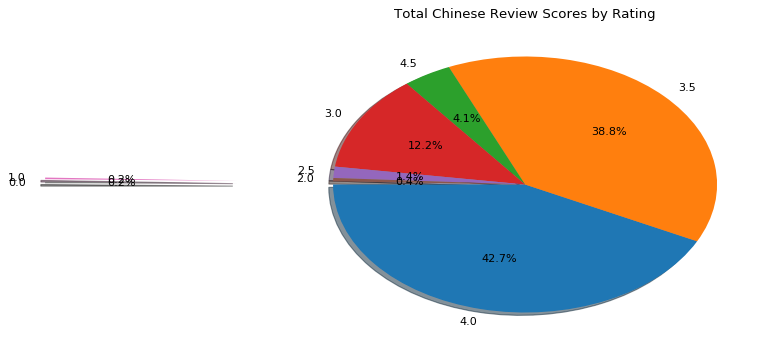

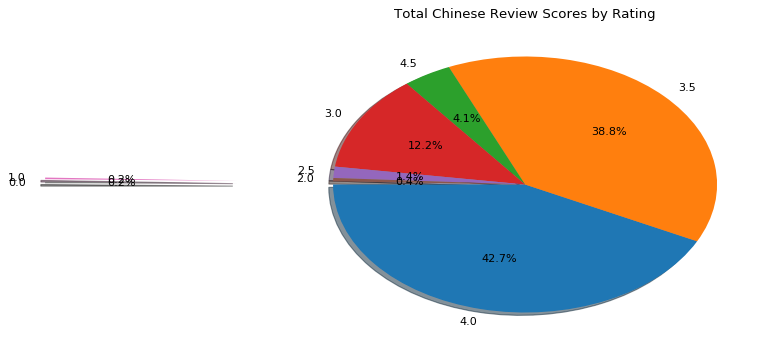

In [61]:
import matplotlib.pyplot as plt
fig = plt.figure(dpi=80)
ax = fig.add_axes([1, 1, 1, 1])
explode = (0,0,0,0,0,0,1.5,1.5)

ax.pie(Chineserevstotal, labels=Chinesescores, autopct='%1.1f%%', shadow=True, explode=explode, startangle=180)
ax.set_title('Total Chinese Review Scores by Rating')
fig.savefig("Chinesereviews.png")
plt.show()

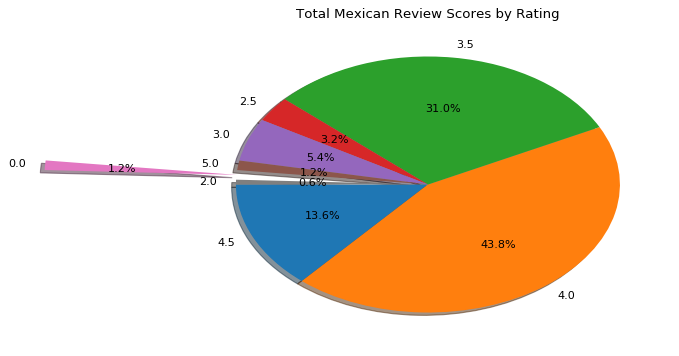

In [65]:
fig = plt.figure(dpi=80)
ax = fig.add_axes([1, 1, 1, 1])
explode = (0,0,0,0,0,0,1,0)

ax.pie(Mexicanrevstotal, labels=Mexicanscores, autopct='%1.1f%%', shadow=True, explode=explode, startangle=180)
ax.set_title('Total Mexican Review Scores by Rating')
fig.savefig("Mexicanreviews.png")
plt.show()

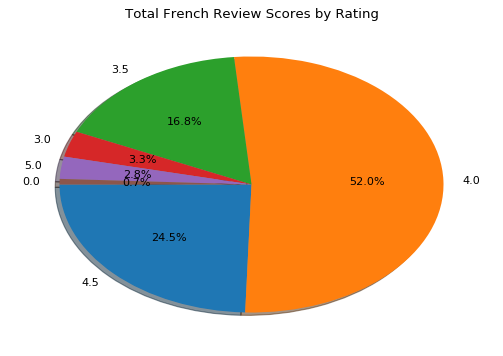

In [67]:
fig = plt.figure(dpi=80)
ax = fig.add_axes([1, 1, 1, 1])
explode = (0,0,0,0,0,0)

ax.pie(Frenchrevstotal, labels=Frenchscores, autopct='%1.1f%%', shadow=True, explode=explode, startangle=180)
ax.set_title('Total French Review Scores by Rating')
fig.savefig("Frenchreviews.png")
plt.show()

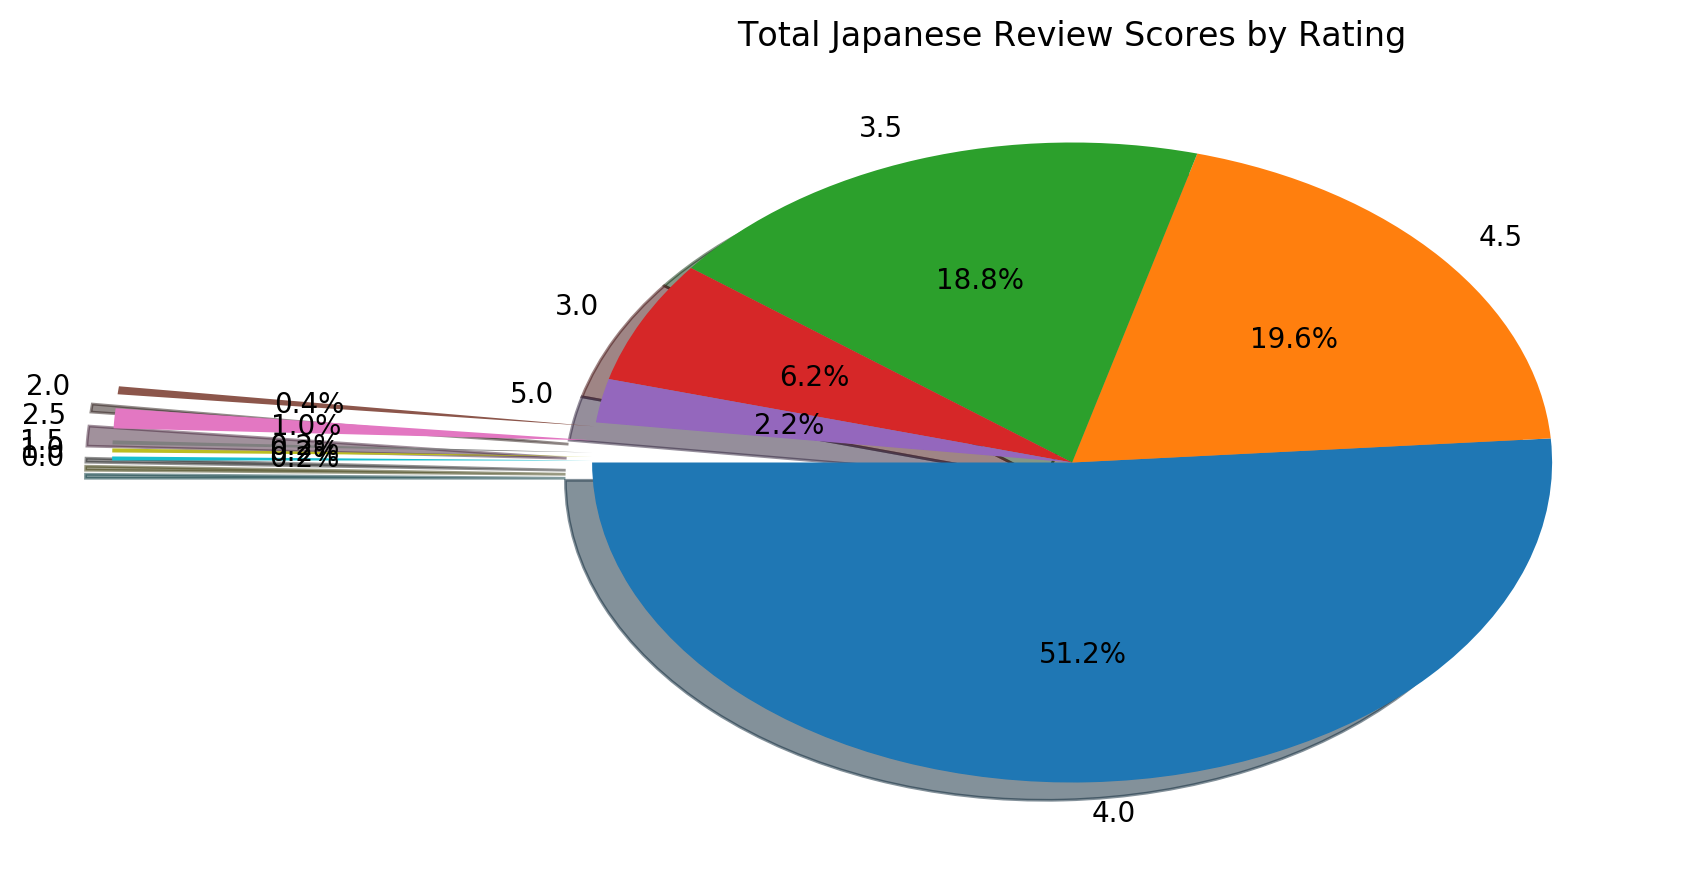

In [74]:
fig = plt.figure(dpi=200)
ax = fig.add_axes([1, 1, 1, 1])
explode = (0,0,0,0,0,1,1,1,1,1)

ax.pie(Japaneserevstotal, labels=Japanesescores, autopct='%1.1f%%', shadow=True, explode=explode, startangle=180)
ax.set_title('Total Japanese Review Scores by Rating')
plt.show()

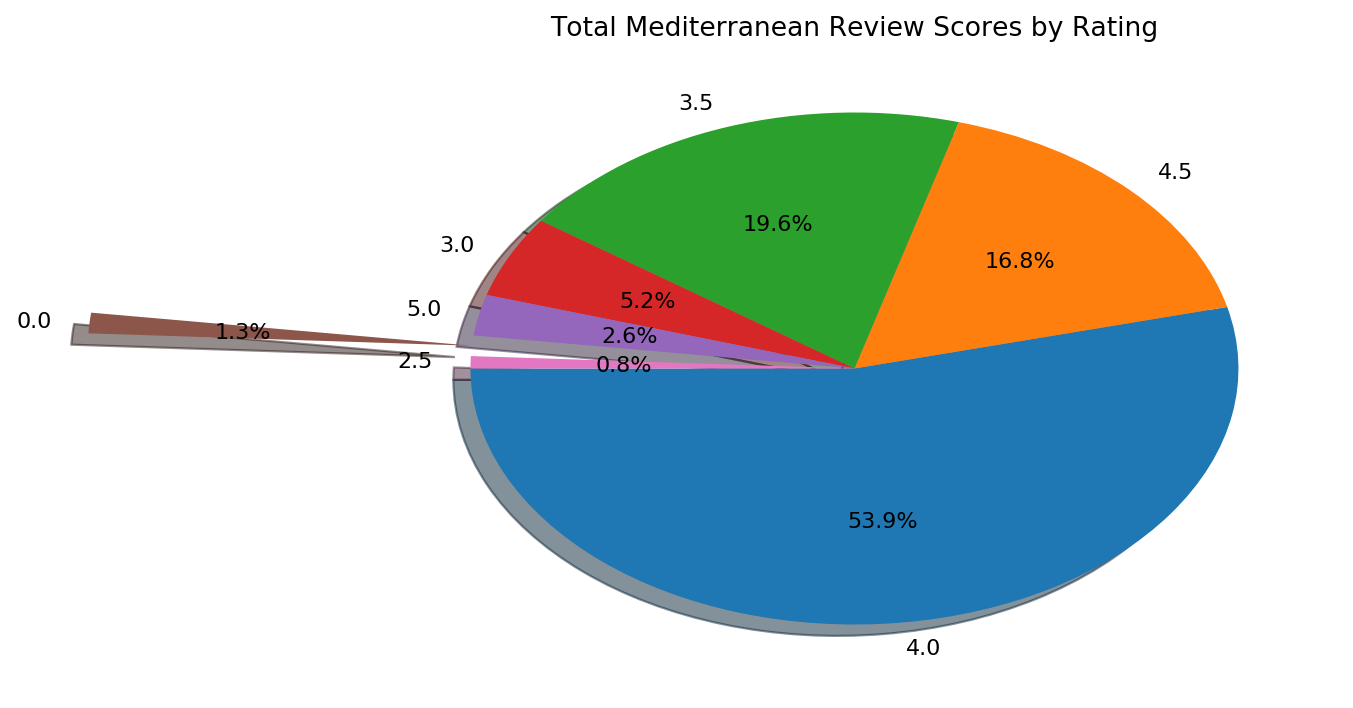

In [78]:
fig = plt.figure(dpi=160)
ax = fig.add_axes([1, 1, 1, 1])
explode = (0,0,0,0,0,1,0)

ax.pie(Mediterraneanrevstotal, labels=Mediterraneanscores, autopct='%1.1f%%', shadow=True, explode=explode, startangle=180)
ax.set_title('Total Mediterranean Review Scores by Rating')
fig.savefig("Mediterraneanreviews.png")
plt.show()

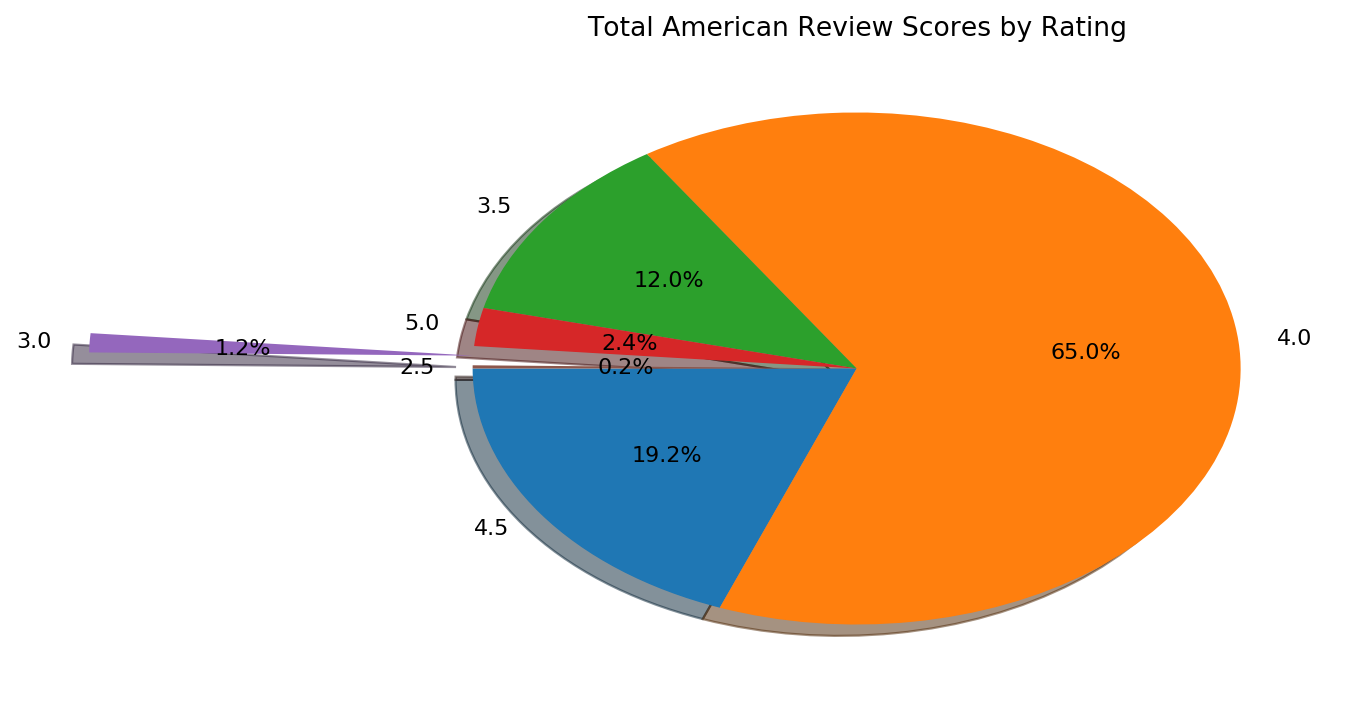

In [82]:
fig = plt.figure(dpi=160)
ax = fig.add_axes([1, 1, 1, 1])
explode = (0,0,0,0,1,0)

ax.pie(Americanrevstotal, labels=Americanscores, autopct='%1.1f%%', shadow=True, explode=explode, startangle=180)
ax.set_title('Total American Review Scores by Rating')
fig.savefig("Americanreviews.png")
plt.show()

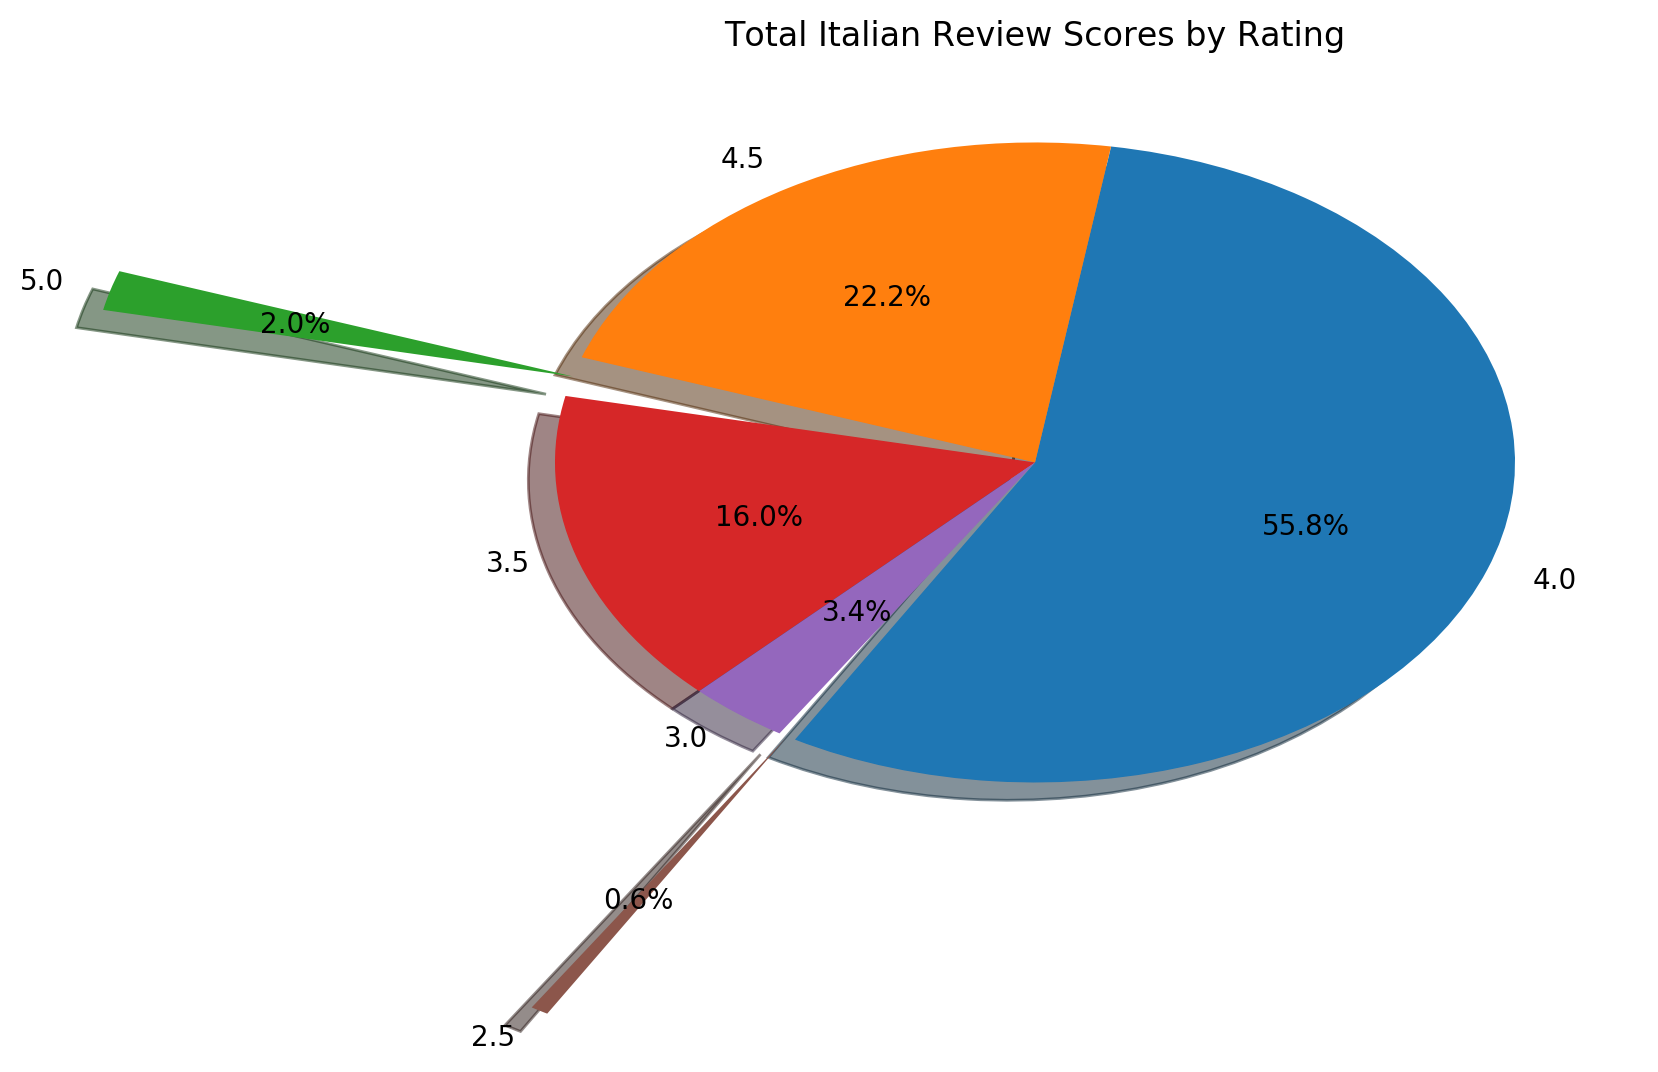

In [90]:
fig = plt.figure(dpi=200)
ax = fig.add_axes([1, 1, 1, 1])
explode = (0,0,1,0,0,1)

ax.pie(Italianrevstotal, labels=Italianscores, autopct='%1.1f%%', shadow=True, explode=explode, startangle=240)
ax.set_title('Total Italian Review Scores by Rating')
fig.savefig("Italianreviews.png")
plt.show()

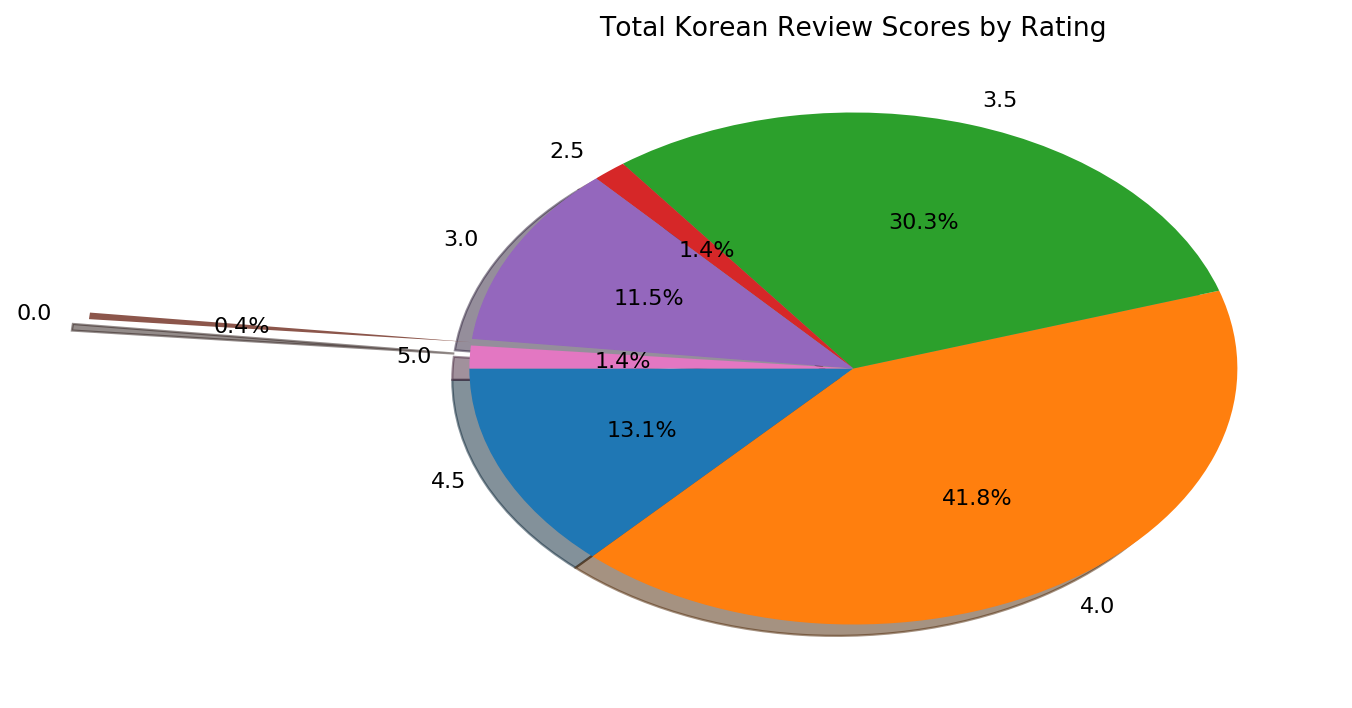

In [92]:
fig = plt.figure(dpi=160)
ax = fig.add_axes([1, 1, 1, 1])
explode = (0,0,0,0,0,1,0)

ax.pie(Koreanrevstotal, labels=Koreanscores, autopct='%1.1f%%', shadow=True, explode=explode, startangle=180)
ax.set_title('Total Korean Review Scores by Rating')
fig.savefig("Koreanreviews.png")
plt.show()

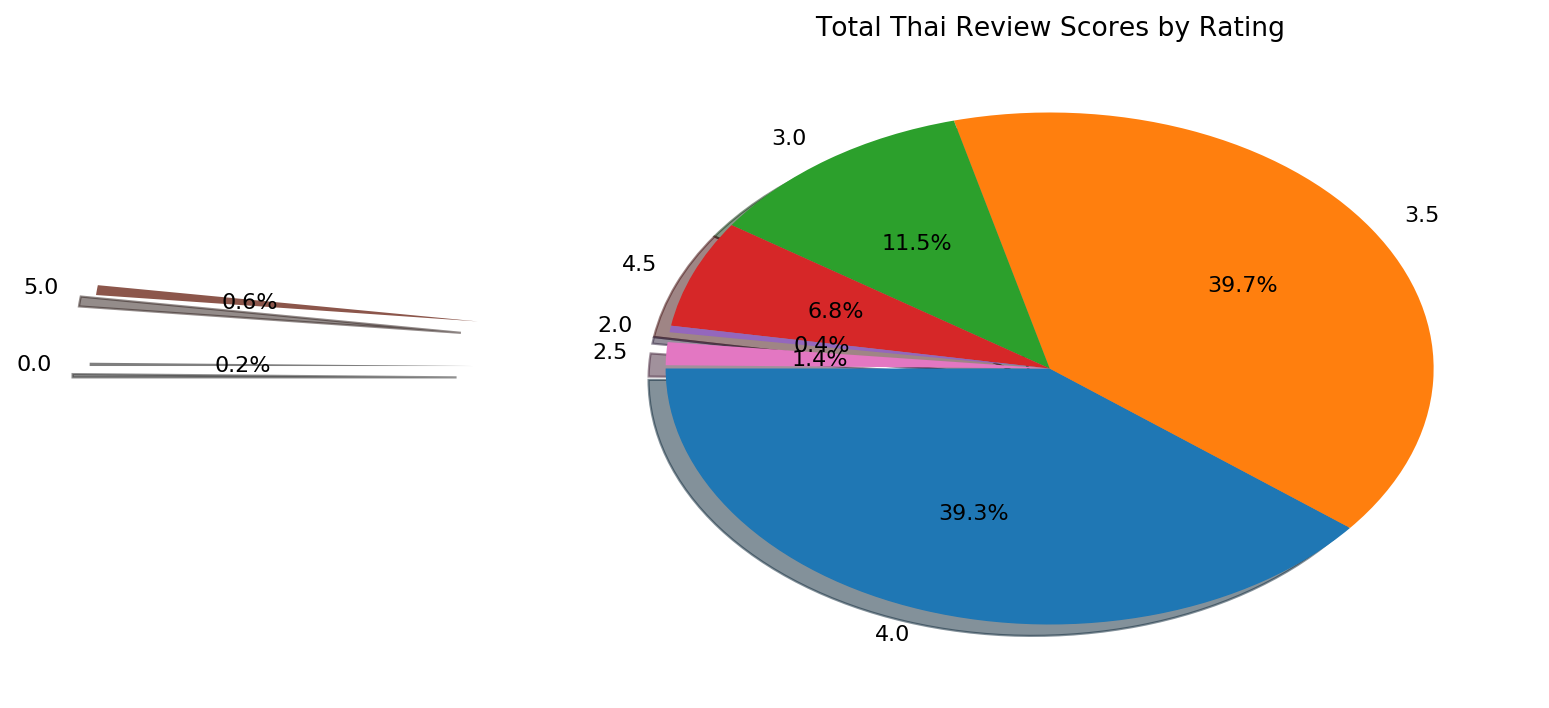

In [97]:
fig = plt.figure(dpi=160)
ax = fig.add_axes([1, 1, 1, 1])
explode = (0,0,0,0,0,1.5,0,1.5)

ax.pie(Thairevstotal, labels=Thaiscores, autopct='%1.1f%%', shadow=True, explode=explode, startangle=180)
ax.set_title('Total Thai Review Scores by Rating')
fig.savefig("Thaireviews.png")
plt.show()

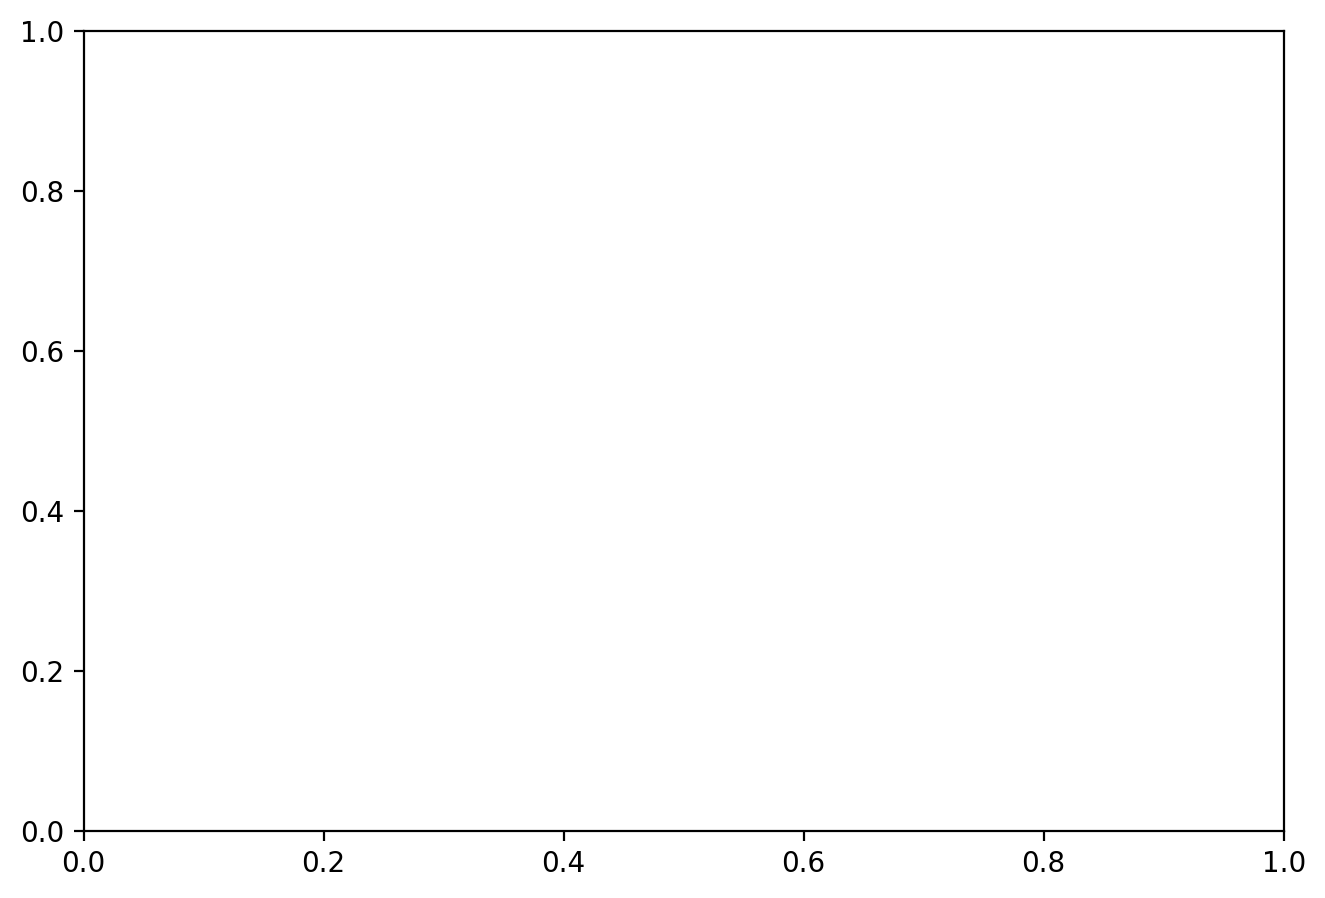

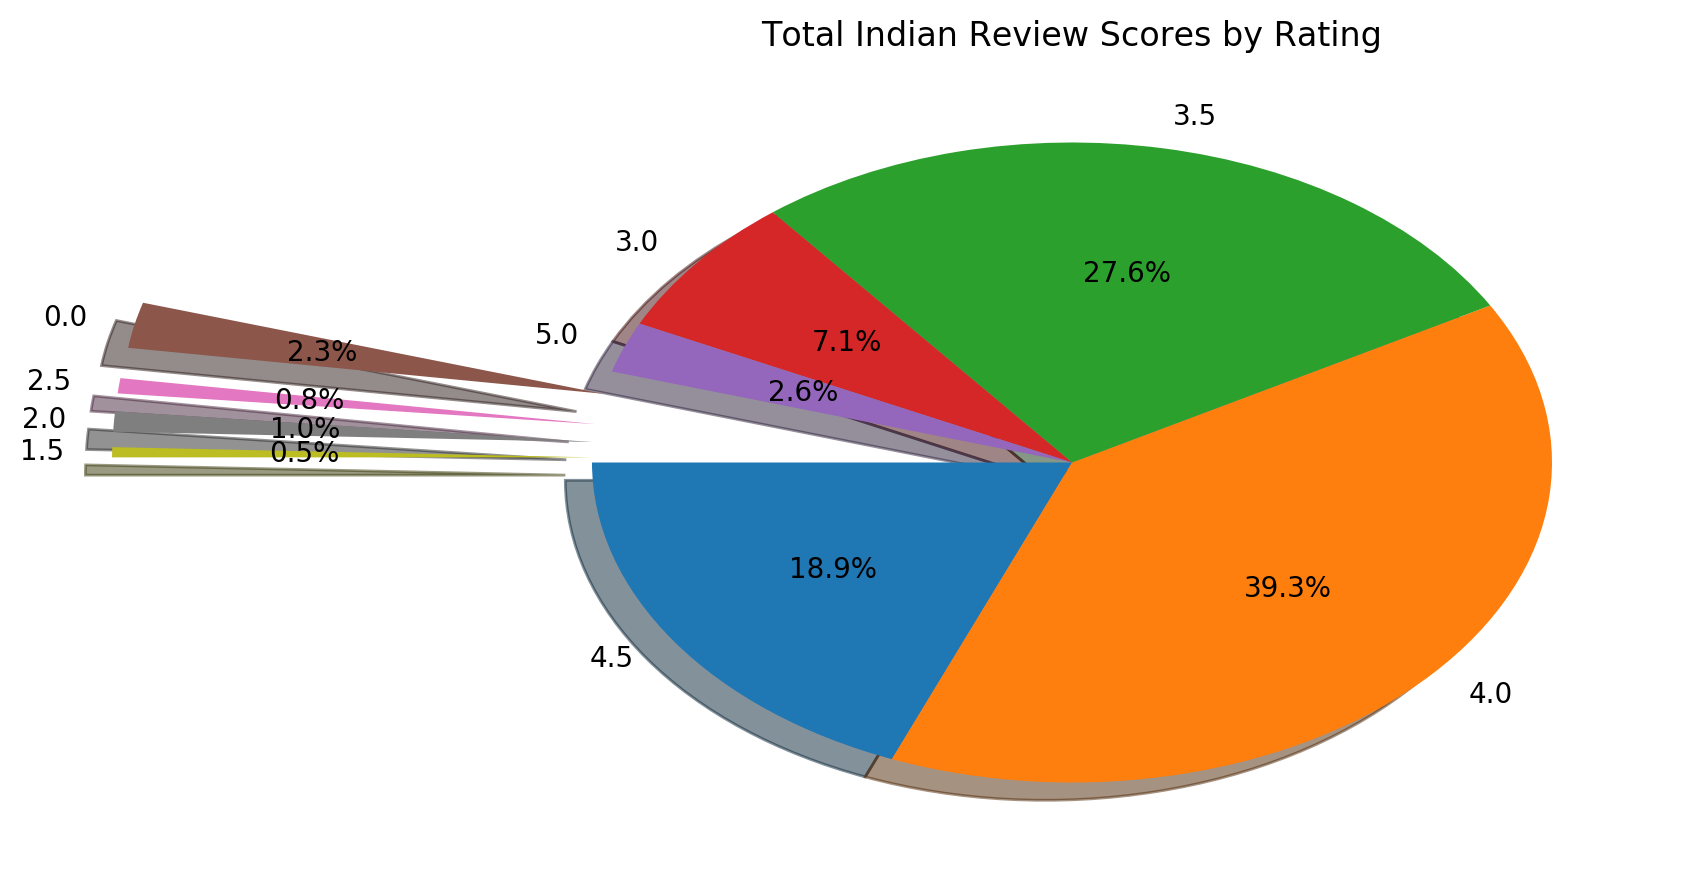

In [100]:
fig = plt.figure(dpi=200)
ax = fig.add_axes([1, 1, 1, 1])
explode = (0,0,0,0,0,1,1,1,1)

ax.pie(Indianrevstotal, labels=Indianscores, autopct='%1.1f%%', shadow=True, explode=explode, startangle=180)
ax.set_title('Total Indian Review Scores by Rating')
plt.show()

In [22]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Districts = ["Castro District", "Chinatown", "Ternderloin", "Inner Richmond", "Inner Sunset", "Alamo Square", "Russian Hill", "Mission District", "NorthBeach/Telegraph", "SoMa"]
types = ["Chinese", "Mexican", "French", "Japanese", "Mediterranean", "American", "Italian", "Korean", "Thai", "Indian"]
import pandas as pd

In [12]:
combo = pd.read_csv("Yelp/comboscores.csv", usecols=[1,2])

In [20]:
combo['Combo Scores']
scores = [round(x,0) for x in combo['Combo Scores']]

[885686.0,
 1072459.0,
 1419197.0,
 930789.0,
 651824.0,
 1484879.0,
 1440026.0,
 888999.0,
 927663.0,
 668462.0]

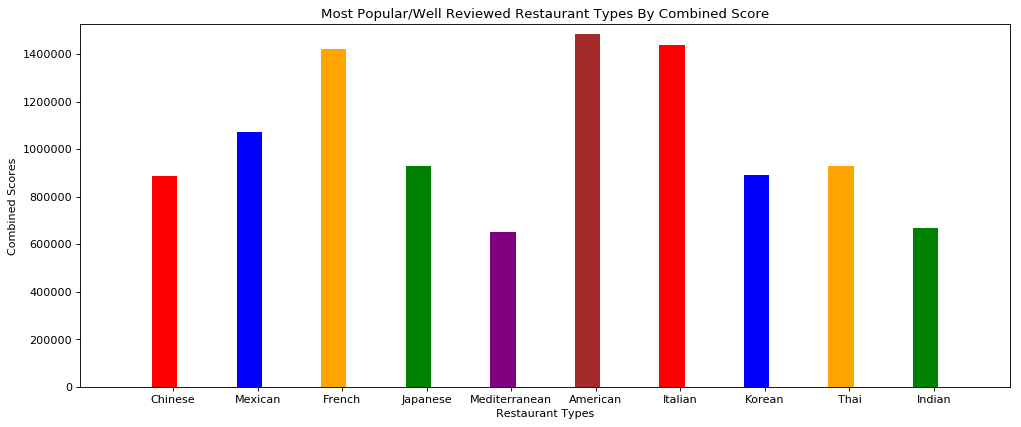

In [46]:
fig = plt.figure(1,[15,6], dpi=80)
ax = fig.add_subplot(111)
width = .3
color = ['red','blue','orange','green','purple','brown']
x_axis = np.arange(len(scores))

ax.bar(x_axis, scores, width, color=color, alpha=1.0)

tick_locations = [value+.1 for value in x_axis]
ax.set_xticks(tick_locations)
ax.set_xticklabels([food for food in types])

ax.set_xlim(-1, len(x_axis))
ax.set_ylim(0, max(scores)+40000)

ax.set_title("Most Popular/Well Reviewed Restaurant Types By Combined Score")
ax.set_xlabel("Restaurant Types")
ax.set_ylabel("Combined Scores")
plt.savefig("Yelp/comboscores.png")
# plt.tight_layout()
plt.show()

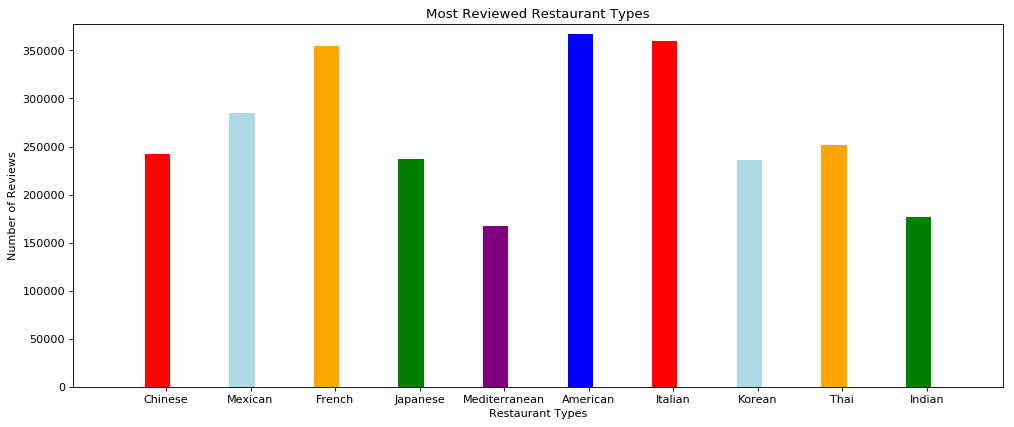

In [49]:
totalreviews = pd.read_csv("Yelp/totalreviews.csv", usecols=[1,2])
reviews = [x for x in totalreviews['Total Reviews']]
fig = plt.figure(1,[15,6], dpi=80)
ax = fig.add_subplot(111)
width = .3
color = ['red','lightblue','orange','green','purple','blue']
x_axis = np.arange(len(reviews))

ax.bar(x_axis, reviews, width, color=color, alpha=1.0)

tick_locations = [value+.1 for value in x_axis]
ax.set_xticks(tick_locations)
ax.set_xticklabels([food for food in types])

ax.set_xlim(-1, len(x_axis))
ax.set_ylim(0, max(reviews)+10000)

ax.set_title("Most Reviewed Restaurant Types")
ax.set_xlabel("Restaurant Types")
ax.set_ylabel("Number of Reviews")
plt.savefig("Yelp/totalreviews.png")
# plt.tight_layout()
plt.show()
#interesting part is that this data isn't too affected when you factor in the average review score for a restaurant type.
#Suggests that restaurants tend to review fairly similarly in their averages.

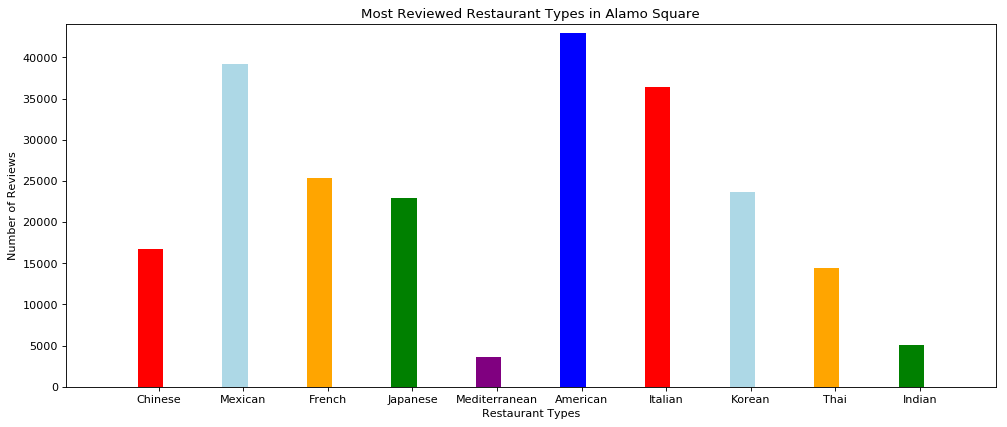

In [52]:
totalreviews = pd.read_csv("Yelp/AlamoSquare.csv", usecols=[1,2])
reviews = [x for x in totalreviews['Total Reviews']]
fig = plt.figure(1,[15,6], dpi=80)
ax = fig.add_subplot(111)
width = .3
color = ['red','lightblue','orange','green','purple','blue']
x_axis = np.arange(len(reviews))

ax.bar(x_axis, reviews, width, color=color, alpha=1.0)

tick_locations = [value+.1 for value in x_axis]
ax.set_xticks(tick_locations)
ax.set_xticklabels([food for food in types])

ax.set_xlim(-1, len(x_axis))
ax.set_ylim(0, max(reviews)+1000)

ax.set_title("Most Reviewed Restaurant Types in Alamo Square")
ax.set_xlabel("Restaurant Types")
ax.set_ylabel("Number of Reviews")
plt.savefig("Yelp/AlamoSquarereviews.png")
plt.show()

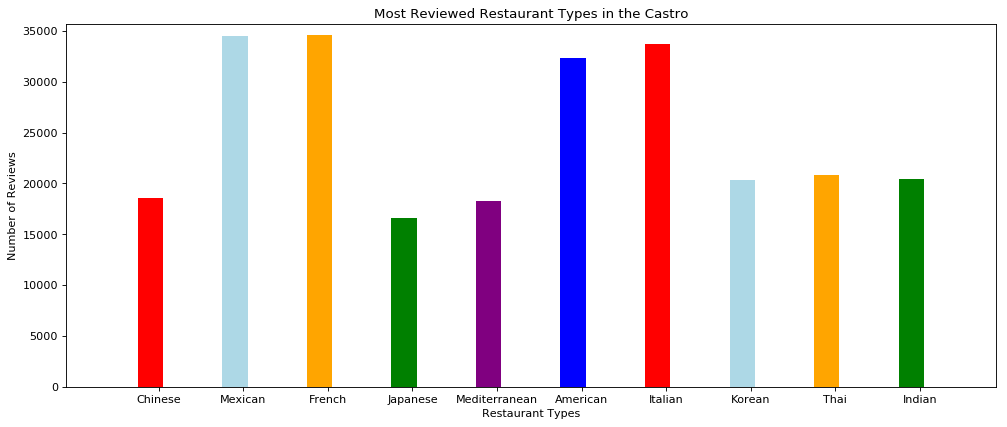

In [53]:
totalreviews = pd.read_csv("Yelp/Castro.csv", usecols=[1,2])
reviews = [x for x in totalreviews['Total Reviews']]
fig = plt.figure(1,[15,6], dpi=80)
ax = fig.add_subplot(111)
width = .3
color = ['red','lightblue','orange','green','purple','blue']
x_axis = np.arange(len(reviews))

ax.bar(x_axis, reviews, width, color=color, alpha=1.0)

tick_locations = [value+.1 for value in x_axis]
ax.set_xticks(tick_locations)
ax.set_xticklabels([food for food in types])

ax.set_xlim(-1, len(x_axis))
ax.set_ylim(0, max(reviews)+1000)

ax.set_title("Most Reviewed Restaurant Types in the Castro")
ax.set_xlabel("Restaurant Types")
ax.set_ylabel("Number of Reviews")
plt.savefig("Yelp/Castroreviews.png")
plt.show()

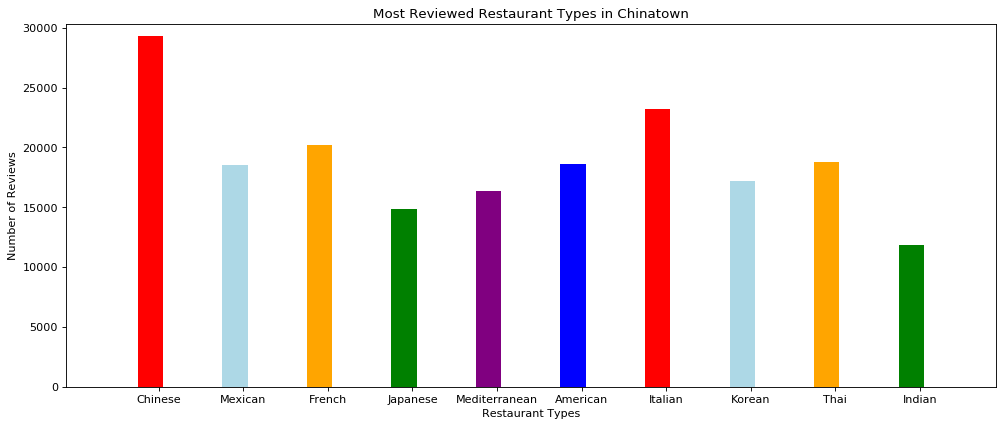

In [55]:
totalreviews = pd.read_csv("Yelp/Chinatown.csv", usecols=[1,2])
reviews = [x for x in totalreviews['Total Reviews']]
fig = plt.figure(1,[15,6], dpi=80)
ax = fig.add_subplot(111)
width = .3
color = ['red','lightblue','orange','green','purple','blue']
x_axis = np.arange(len(reviews))

ax.bar(x_axis, reviews, width, color=color, alpha=1.0)

tick_locations = [value+.1 for value in x_axis]
ax.set_xticks(tick_locations)
ax.set_xticklabels([food for food in types])

ax.set_xlim(-1, len(x_axis))
ax.set_ylim(0, max(reviews)+1000)

ax.set_title("Most Reviewed Restaurant Types in Chinatown")
ax.set_xlabel("Restaurant Types")
ax.set_ylabel("Number of Reviews")
plt.savefig("Yelp/Chinatownreviews.png")
plt.show()

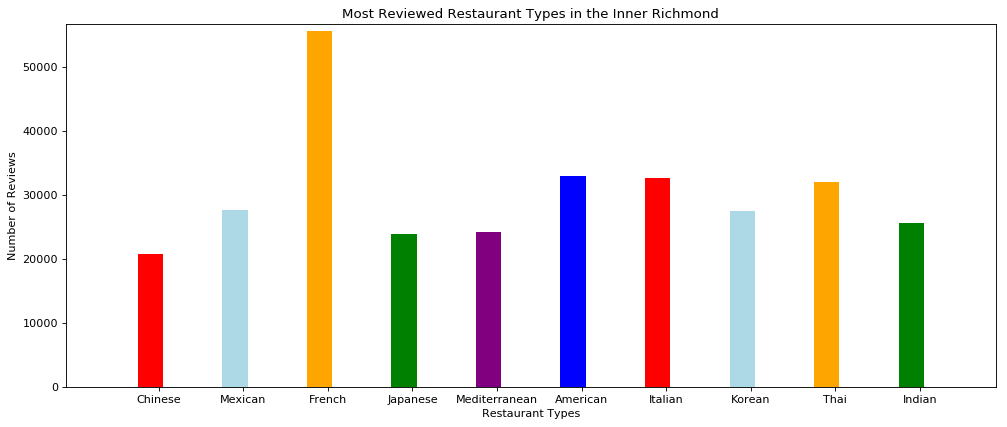

In [56]:
totalreviews = pd.read_csv("Yelp/InnerRichmond.csv", usecols=[1,2])
reviews = [x for x in totalreviews['Total Reviews']]
fig = plt.figure(1,[15,6], dpi=80)
ax = fig.add_subplot(111)
width = .3
color = ['red','lightblue','orange','green','purple','blue']
x_axis = np.arange(len(reviews))

ax.bar(x_axis, reviews, width, color=color, alpha=1.0)

tick_locations = [value+.1 for value in x_axis]
ax.set_xticks(tick_locations)
ax.set_xticklabels([food for food in types])

ax.set_xlim(-1, len(x_axis))
ax.set_ylim(0, max(reviews)+1000)

ax.set_title("Most Reviewed Restaurant Types in the Inner Richmond")
ax.set_xlabel("Restaurant Types")
ax.set_ylabel("Number of Reviews")
plt.savefig("Yelp/InnerRichmondreviews.png")
plt.show()

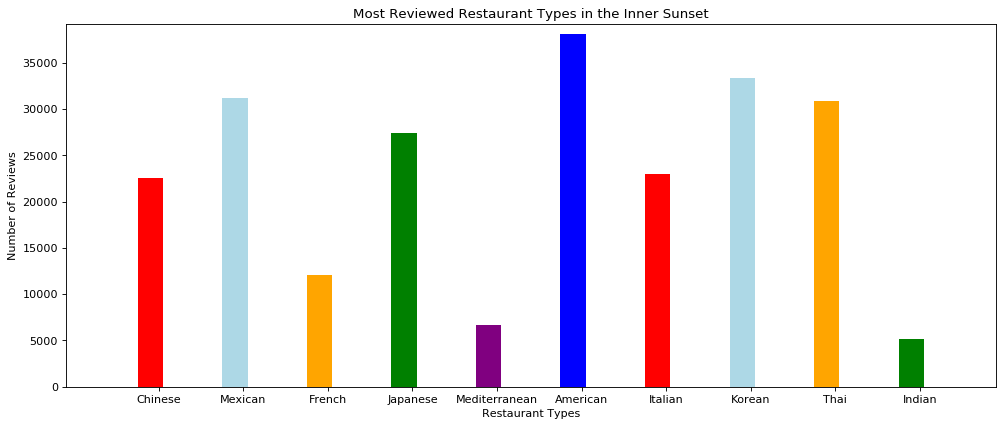

In [57]:
totalreviews = pd.read_csv("Yelp/InnerSunset.csv", usecols=[1,2])
reviews = [x for x in totalreviews['Total Reviews']]
fig = plt.figure(1,[15,6], dpi=80)
ax = fig.add_subplot(111)
width = .3
color = ['red','lightblue','orange','green','purple','blue']
x_axis = np.arange(len(reviews))

ax.bar(x_axis, reviews, width, color=color, alpha=1.0)

tick_locations = [value+.1 for value in x_axis]
ax.set_xticks(tick_locations)
ax.set_xticklabels([food for food in types])

ax.set_xlim(-1, len(x_axis))
ax.set_ylim(0, max(reviews)+1000)

ax.set_title("Most Reviewed Restaurant Types in the Inner Sunset")
ax.set_xlabel("Restaurant Types")
ax.set_ylabel("Number of Reviews")
plt.savefig("Yelp/InnerSunsetreviews.png")
plt.show()

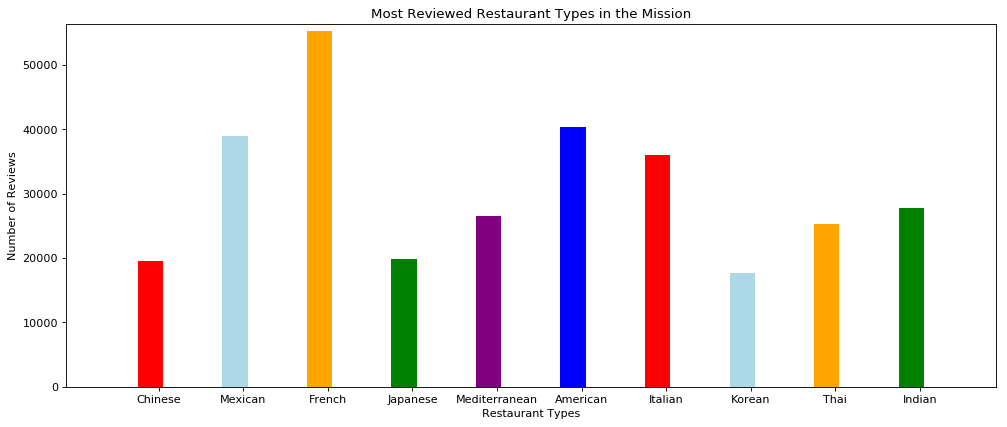

In [58]:
totalreviews = pd.read_csv("Yelp/MissionDistrict.csv", usecols=[1,2])
reviews = [x for x in totalreviews['Total Reviews']]
fig = plt.figure(1,[15,6], dpi=80)
ax = fig.add_subplot(111)
width = .3
color = ['red','lightblue','orange','green','purple','blue']
x_axis = np.arange(len(reviews))

ax.bar(x_axis, reviews, width, color=color, alpha=1.0)

tick_locations = [value+.1 for value in x_axis]
ax.set_xticks(tick_locations)
ax.set_xticklabels([food for food in types])

ax.set_xlim(-1, len(x_axis))
ax.set_ylim(0, max(reviews)+1000)

ax.set_title("Most Reviewed Restaurant Types in the Mission")
ax.set_xlabel("Restaurant Types")
ax.set_ylabel("Number of Reviews")
plt.savefig("Yelp/Missionreviews.png")
plt.show()

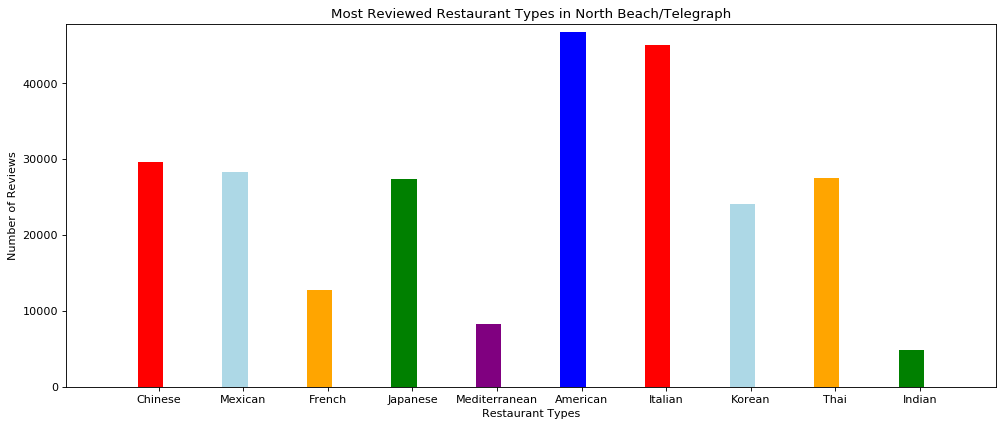

In [59]:
totalreviews = pd.read_csv("Yelp/NorthBeach.csv", usecols=[1,2])
reviews = [x for x in totalreviews['Total Reviews']]
fig = plt.figure(1,[15,6], dpi=80)
ax = fig.add_subplot(111)
width = .3
color = ['red','lightblue','orange','green','purple','blue']
x_axis = np.arange(len(reviews))

ax.bar(x_axis, reviews, width, color=color, alpha=1.0)

tick_locations = [value+.1 for value in x_axis]
ax.set_xticks(tick_locations)
ax.set_xticklabels([food for food in types])

ax.set_xlim(-1, len(x_axis))
ax.set_ylim(0, max(reviews)+1000)

ax.set_title("Most Reviewed Restaurant Types in North Beach/Telegraph")
ax.set_xlabel("Restaurant Types")
ax.set_ylabel("Number of Reviews")
plt.savefig("Yelp/NorthBeachreviews.png")
plt.show()

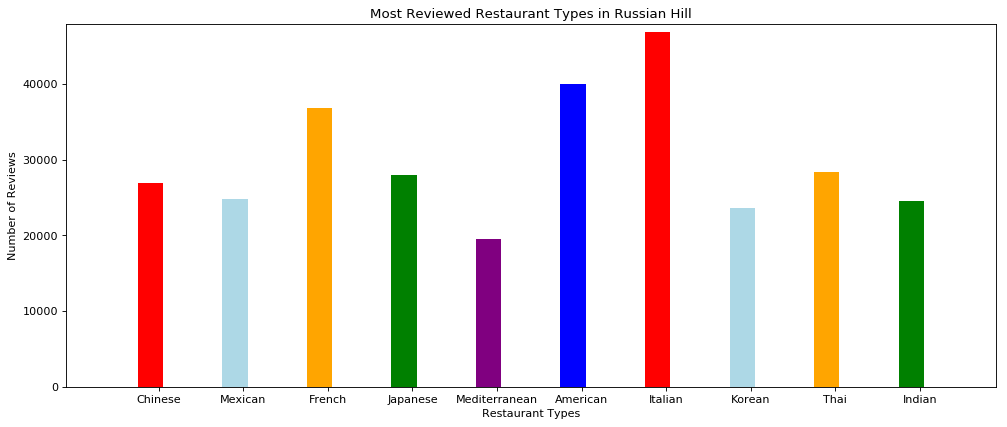

In [60]:
totalreviews = pd.read_csv("Yelp/RussianHill.csv", usecols=[1,2])
reviews = [x for x in totalreviews['Total Reviews']]
fig = plt.figure(1,[15,6], dpi=80)
ax = fig.add_subplot(111)
width = .3
color = ['red','lightblue','orange','green','purple','blue']
x_axis = np.arange(len(reviews))

ax.bar(x_axis, reviews, width, color=color, alpha=1.0)

tick_locations = [value+.1 for value in x_axis]
ax.set_xticks(tick_locations)
ax.set_xticklabels([food for food in types])

ax.set_xlim(-1, len(x_axis))
ax.set_ylim(0, max(reviews)+1000)

ax.set_title("Most Reviewed Restaurant Types in Russian Hill")
ax.set_xlabel("Restaurant Types")
ax.set_ylabel("Number of Reviews")
plt.savefig("Yelp/RussianHillreviews.png")
plt.show()

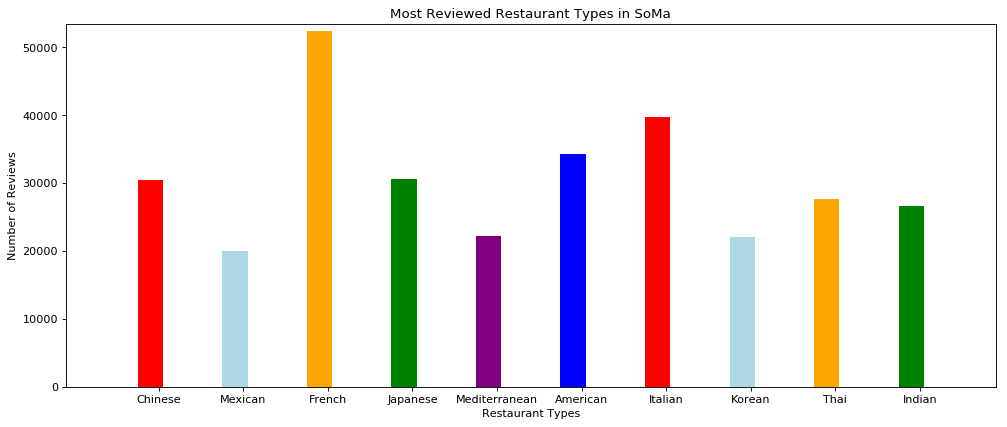

In [61]:
totalreviews = pd.read_csv("Yelp/Soma.csv", usecols=[1,2])
reviews = [x for x in totalreviews['Total Reviews']]
fig = plt.figure(1,[15,6], dpi=80)
ax = fig.add_subplot(111)
width = .3
color = ['red','lightblue','orange','green','purple','blue']
x_axis = np.arange(len(reviews))

ax.bar(x_axis, reviews, width, color=color, alpha=1.0)

tick_locations = [value+.1 for value in x_axis]
ax.set_xticks(tick_locations)
ax.set_xticklabels([food for food in types])

ax.set_xlim(-1, len(x_axis))
ax.set_ylim(0, max(reviews)+1000)

ax.set_title("Most Reviewed Restaurant Types in SoMa")
ax.set_xlabel("Restaurant Types")
ax.set_ylabel("Number of Reviews")
plt.savefig("Yelp/SoMareviews.png")
plt.show()

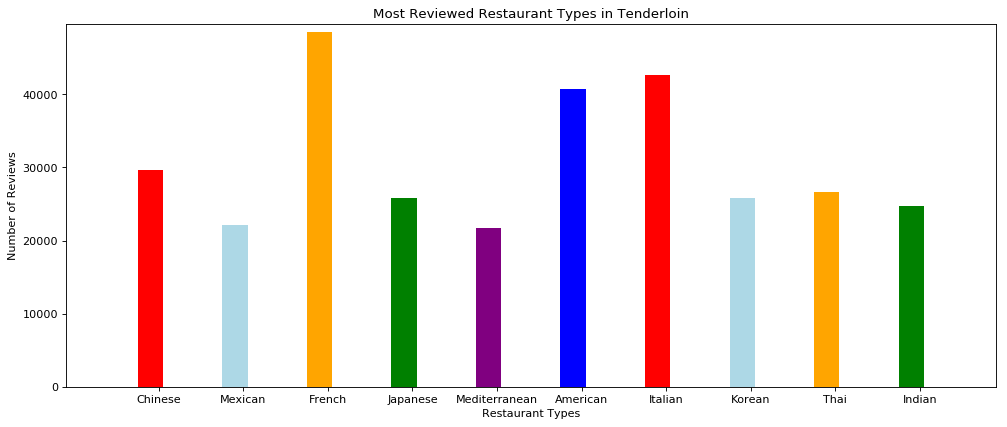

In [62]:
totalreviews = pd.read_csv("Yelp/Tenderloin.csv", usecols=[1,2])
reviews = [x for x in totalreviews['Total Reviews']]
fig = plt.figure(1,[15,6], dpi=80)
ax = fig.add_subplot(111)
width = .3
color = ['red','lightblue','orange','green','purple','blue']
x_axis = np.arange(len(reviews))

ax.bar(x_axis, reviews, width, color=color, alpha=1.0)

tick_locations = [value+.1 for value in x_axis]
ax.set_xticks(tick_locations)
ax.set_xticklabels([food for food in types])

ax.set_xlim(-1, len(x_axis))
ax.set_ylim(0, max(reviews)+1000)

ax.set_title("Most Reviewed Restaurant Types in Tenderloin")
ax.set_xlabel("Restaurant Types")
ax.set_ylabel("Number of Reviews")
plt.savefig("Yelp/Tenderloinreviews.png")
plt.show()